# Зависимость координаты от времени

None None
8.162432422259032e-05 0.01010101012254555 -0.0003961950554078344 -0.01010101012254555


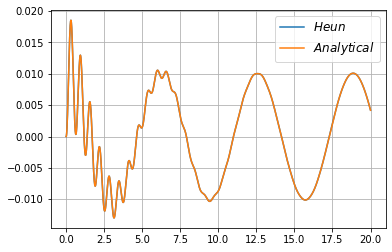

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess


omega = 10.0
beta = 0.8
initial_x = 0.0
dt = 0.001
initial_v = 0.0
time = 20
force = 1
force_omega = 1

p = subprocess.run([r'C:\Users\User\Desktop\3_term\3rd-semester-MIPT\Informatics\force\cmake-build-debug\force',
                 str(omega), str(beta), str(initial_x), str(initial_v), str(force), str(force_omega), str(dt), str(time)])
print(p.stdout, p.stderr)


with open('x_euler.bin', 'rb') as file:
    x_euler = np.fromfile(file, dtype=float, count=-1)

with open('v_euler.bin', 'rb') as file:
    v_euler = np.fromfile(file, dtype=float, count=-1)
    
with open('x_heun.bin', 'rb') as file:
    x_heun = np.fromfile(file, dtype=float, count=-1)

with open('v_heun.bin', 'rb') as file:
    v_heun = np.fromfile(file, dtype=float, count=-1)
    

t = np.linspace(0.0, time, np.size(x_euler));
plt.plot(t, x_heun, label=r'$Heun$')
#plt.plot(t, x_euler, label=r'$Euler$')
x = np.empty(np.size(x_euler), float)
v = np.empty(np.size(x_euler), float)
phi = np.arctan (beta * force_omega / (omega**2 - force_omega**2))
omega_1 = np.sqrt(omega**2 - (beta**2)/4)
A = force / np.sqrt((omega**2 - force_omega**2)**2 - (beta**2) * (force_omega**2))
C1 = initial_x - A * np.cos(-phi)
C2 = (initial_v + C1 * beta/2 + A * force_omega * np.sin(phi))/omega_1
for i in range(np.size(x_euler)):
    x[i] = np.exp(-0.5 * beta * t[i])*(C1 * np.cos(omega_1 * t[i]) + C2 * np.sin(omega_1 * t[i])) + A * np.cos(force_omega * t[i] - phi)
plt.plot(t, x, label=r'$Analytical$')
plt.legend(loc='best', fontsize=12)
plt.grid(True)

In [66]:
import sympy as sp
%precision 3
sp.init_printing()

# define ode
w0, g, t = sp.symbols('w0 gamma t')
f = sp.Function('f')
df = sp.diff(f(t),t)
d2f = sp.diff(df,t)
raw_ode = sp.Eq(d2f + g*df + w0**2*(f(t)), 1*sp.cos(1*t))
print(raw_ode)

ode = raw_ode.subs({w0:10, g:0.8})

# solve ode (general colution)
sol = sp.dsolve(ode, f(t))
#sp.pprint(sol)

# solve initial conditions problem
ic1 = sp.Eq(sol.rhs.subs({t:0}), 0)
ic2 = sp.Eq(sol.rhs.diff(t).subs({t:0}), 0)

C1, C2 = sp.symbols("C1, C2")
C1_C2_sol = sp.solve([ic1, ic2], (C1, C2))

# pretty print solution
print("equation:")
#sp.pprint(ode)

print("\ninitial conditions")
#sp.pprint(ic1)
#sp.pprint(ic2)

solution = sol.rhs.subs(C1_C2_sol).subs({w0:1})
print("\nraw_solution:")
#sp.pprint(solution)
ivp_sol = sp.simplify(solution)

Eq(gamma*Derivative(f(t), t) + w0**2*f(t) + Derivative(f(t), (t, 2)), cos(t))
equation:

initial conditions

raw_solution:


In [67]:
ivp_sol

# АЧХ

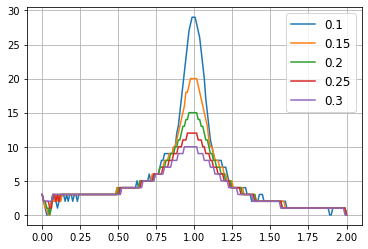

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess


omega = 1.0
beta = 0.5
initial_x = 1.0
dt = 0.01
force = 3.0
time = 50.0
initial_v = 0.0
number_of_points = 200
number_of_beta = 5
max_omega = 2.0
max_beta = 0.3

f = np.empty(number_of_points, float)
A = np.empty(number_of_points, float)

force_omega = np.linspace(0.0, max_omega, number_of_points)
beta = np.linspace(0.1, max_beta, number_of_beta)

for j in range (number_of_beta):
    for i in range (number_of_points):
        p = subprocess.Popen([r'C:\Users\User\Desktop\3_term\3rd-semester-MIPT\Informatics\force\cmake-build-debug\force',
                        str(omega), str(beta[j]), str(initial_x), str(initial_v), str(force), str(force_omega[i]), str(dt), str(time)], stdout=subprocess.PIPE, shell=True,
                        stdin=subprocess.PIPE,
                        stderr=subprocess.PIPE)
        p.wait()
        with open('amplitude.bin', 'rb') as file:
            A_array = np.fromfile(file, dtype=float, count=-1)
        A[i] = A_array[0]
    plt.plot(force_omega, A, label = str(beta[j]))
plt.legend(loc='best', fontsize=12)
plt.grid(True)
